In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import os

In [2]:
df = pd.read_csv(r"C:\Users\Windows 10\OneDrive\Desktop\Coding\Python\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Exploratory data analysis

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

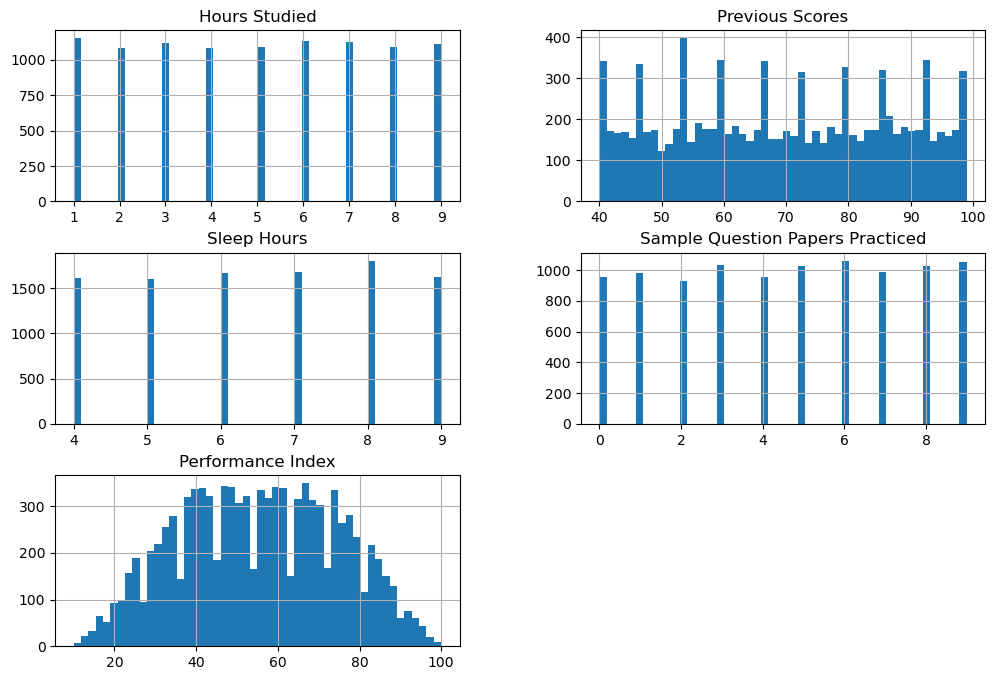

In [3]:
df.hist(bins=50, figsize=(12, 8))

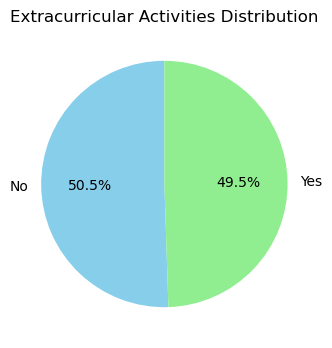

In [4]:
plt.figure(figsize=(6, 4))

# Extracurricular Activities
df['Extracurricular Activities'].value_counts().plot(
	kind='pie', 
	colors=['skyblue', 'lightgreen'],  # specify colors for each category
	autopct='%1.1f%%', 
	startangle=90
)
plt.title('Extracurricular Activities Distribution')
plt.ylabel('')
plt.xlabel('')
plt.show()

# Missing Value Check

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# Add dummy Feature

In [7]:
encoder = LabelEncoder()
df['Extracurricular Activities_Encoded'] = encoder.fit_transform(df['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Encoded
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1
9996,7,64,Yes,8,5,58.0,1
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


In [8]:
df.groupby('Extracurricular Activities')['Extracurricular Activities_Encoded'].mean()

Extracurricular Activities
No     0.0
Yes    1.0
Name: Extracurricular Activities_Encoded, dtype: float64

# Manage Outlier

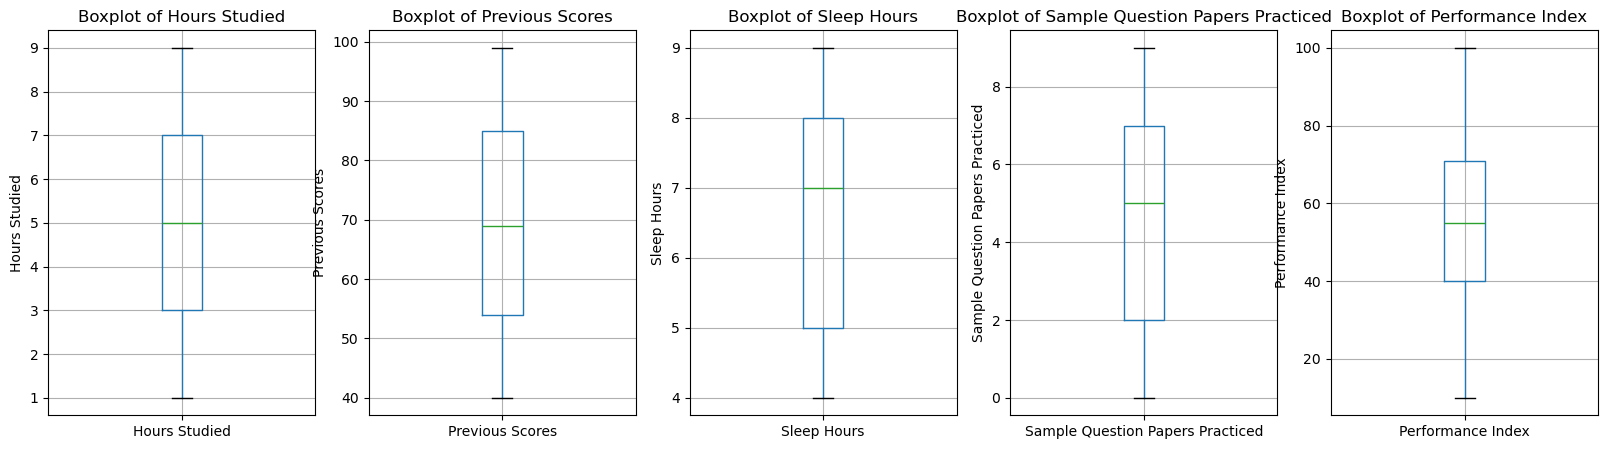

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
df.boxplot(column=['Hours Studied'])
plt.title("Boxplot of Hours Studied")
plt.ylabel("Hours Studied")

plt.subplot(1, 5, 2)
df.boxplot(column=['Previous Scores'])
plt.title("Boxplot of Previous Scores")
plt.ylabel("Previous Scores")

plt.subplot(1, 5, 3)
df.boxplot(column=['Sleep Hours'])
plt.title("Boxplot of Sleep Hours")
plt.ylabel("Sleep Hours")

plt.subplot(1, 5, 4)
df.boxplot(column=['Sample Question Papers Practiced']) 
plt.title("Boxplot of Sample Question Papers Practiced")
plt.ylabel("Sample Question Papers Practiced")

plt.subplot(1, 5, 5)
df.boxplot(column=['Performance Index'])
plt.title("Boxplot of Performance Index")
plt.ylabel("Performance Index")

plt.show()

In [10]:
def detect_outliers_iqr(df):
    df_out = df.copy()
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_out[f"{col}_outlier"] = ~df[col].between(lower_bound, upper_bound)

    return df_out

df_with_outliers = detect_outliers_iqr(df)

print(df_with_outliers)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

In [11]:
print(df_with_outliers['Hours Studied_outlier'].value_counts())
print(df_with_outliers['Previous Scores_outlier'].value_counts())
print(df_with_outliers['Sleep Hours_outlier'].value_counts())
print(df_with_outliers['Sample Question Papers Practiced_outlier'].value_counts())
print(df_with_outliers['Performance Index_outlier'].value_counts())

Hours Studied_outlier
False    10000
Name: count, dtype: int64
Previous Scores_outlier
False    10000
Name: count, dtype: int64
Sleep Hours_outlier
False    10000
Name: count, dtype: int64
Sample Question Papers Practiced_outlier
False    10000
Name: count, dtype: int64
Performance Index_outlier
False    10000
Name: count, dtype: int64


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>,
        <Axes: title={'center': 'Extracurricular Activities_Encoded'}>]],
      dtype=object)

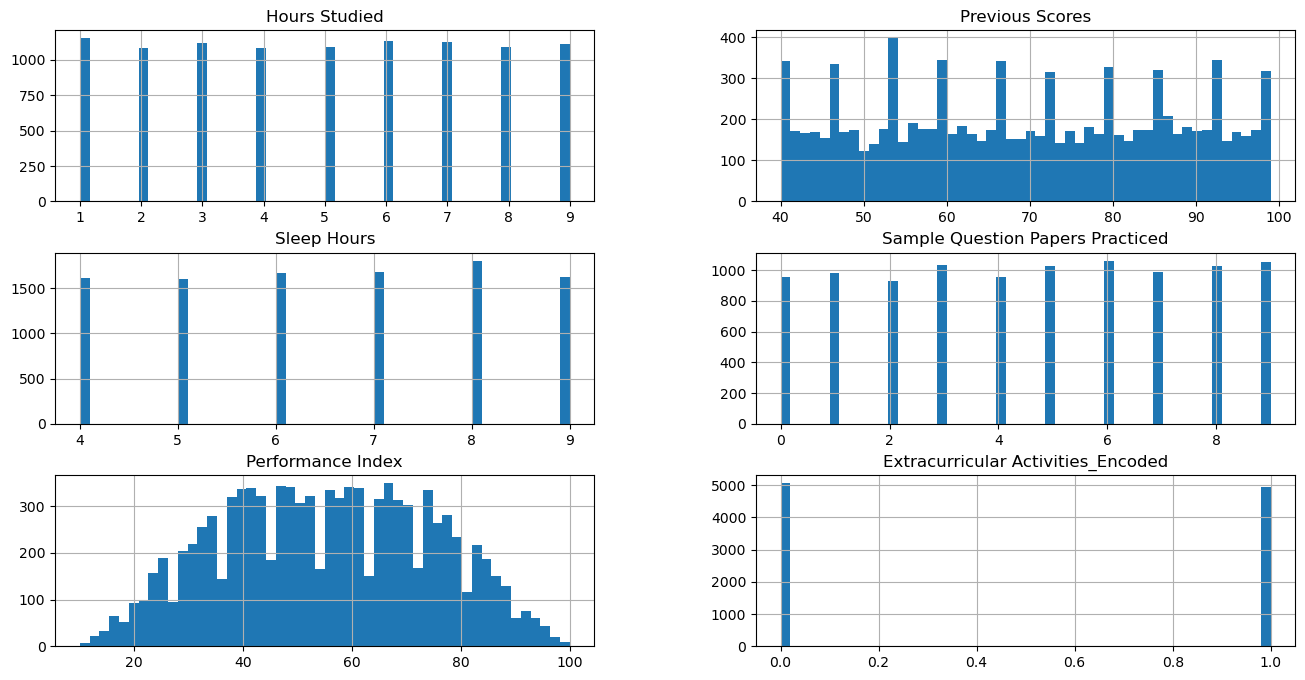

In [12]:
df.hist(bins=50, figsize=(16, 8))

# Save Data Cleaned Flie

In [13]:
save_path = os.path.join(os.getcwd(), 'StudentCleaned.xlsx')
df.to_excel(save_path, index=False)
print(f"Saved Excel to: {save_path}")

Saved Excel to: c:\Users\Windows 10\OneDrive\Desktop\Coding\Python\Regression Project\StudentCleaned.xlsx
